In [7]:
## Import things

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import networkX
import networkx as nx

# Import multiNetX
import multinetx as mx

# Need to save as json
import scipy.io as sio
from networkx.readwrite import json_graph
import json
import pandas as pd

print("Done importing packages :)")

Done importing packages :)


## Multilayer network ex 1: Two aspects, two layers

Aspect L1: nodes as usual
Aspect L2: "A" or "B"

In [2]:
nNodes = 17

g1 = mx.generators.erdos_renyi_graph(nNodes,0.5,seed=218)
g2 = mx.generators.erdos_renyi_graph(nNodes,0.5,seed=132)

# Define adjacency between layers
adj_block = mx.lil_matrix(np.zeros((nNodes*3,nNodes*3)))
adj_block[0:  nNodes,  nNodes:2*nNodes] = np.identity(nNodes)    # L_12
adj_block += adj_block.T

# Create multilayer graph
mg = mx.MultilayerGraph(list_of_layers=[g1,g2],
                        inter_adjacency_matrix=adj_block)

mg.set_edges_weights(intra_layer_edges_weight=2,
                     inter_layer_edges_weight=1)




done writing file


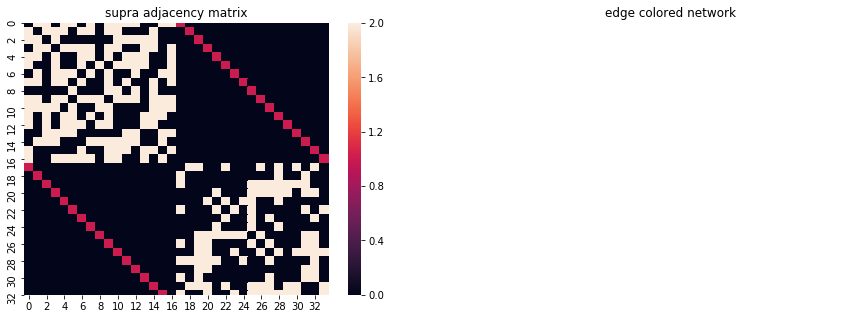

In [3]:
## Save to json and plot draft fig

fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(121)
sns.heatmap(mx.adjacency_matrix(mg,weight='weight').todense())
ax1.set_title('supra adjacency matrix')

ax2 = fig.add_subplot(122)
ax2.axis('off')
ax2.set_title('edge colored network')
# pos = mx.get_position(mg,mx.fruchterman_reingold_layout(g1),
#                       layer_vertical_shift=0.3,
#                       layer_horizontal_shift=0.0,
#                       proj_angle=47)

# pos = [nx.layout.fruchterman_reingold_layout(g1, dim=3)
#             for i in range(mg.get_number_of_layers())
#         ]
pos = nx.layout.fruchterman_reingold_layout(g1, dim=3)

# pos = mx.get_position3D(mg)
# mx.draw_networkx(mg,pos=pos,ax=ax2,node_size=50,with_labels=False,
#                  edge_color=[mg[a][b]['weight'] for a,b in mg.edges()],
#                  edge_cmap=plt.cm.jet_r)
# plt.show()

## Define dictionaries and save to json

# From the sparse adj, make a networkx graph and add node attributes
G = nx.from_numpy_array(mx.adjacency_matrix(mg,weight='weight').todense())

nLevels = 2
L2_classes = np.arange(nLevels)
## Each node will get attributes L1=node id, L2=slice number, x position, y position, and name/id

scalefact = 20
id_dict = {i:("id"+str(i)) for i in np.arange(nNodes*nLevels)}
x_dict = {}
y_dict = {}
for level in L2_classes:
    pos_dict = pos
    x_dict.update({(key+(level*nNodes)):float(pos_dict[key][0]+scalefact) for key in pos_dict})
    y_dict.update({(key+(level*nNodes)):float(pos_dict[key][1]+scalefact) for key in pos_dict})

L1_dict = {i:str(i) for i in np.arange(nNodes*nLevels)}
z_shift = -2
z_dict = {i:1*z_shift for i in np.arange(nNodes)}
z_dict.update({i:(2)*z_shift for i in (np.arange(nNodes)+ nNodes)})
L2_dict = {i:0 for i in np.arange(nNodes)}
L2_dict.update({i:1 for i in (np.arange(nNodes)+ nNodes)})



# nx.set_node_attributes(G, pos, name="pos")
nx.set_node_attributes(G, id_dict, name = "name")
nx.set_node_attributes(G, x_dict, name = "x")
nx.set_node_attributes(G, y_dict, name = "y")
nx.set_node_attributes(G, z_dict, name = "z")
nx.set_node_attributes(G, L1_dict, name= "L1")
nx.set_node_attributes(G, L2_dict, name= "L2")

# ## Set edge attributes
# edge_dict = {}
# for edge in G.edges():
    
#     edge_dict[edge] = birth_times[max(edge[0],edge[1])]

# edge_dict
# nx.set_edge_attributes(G,edge_dict, name = "birth_time")

## Write to json file

G_json = json_graph.node_link_data(G)
with open('data/mx_slide9.json', 'w') as fp:
    json.dump(G_json, fp)

print("done writing file")

## Ex 2: 2 aspects, 5 layers


In [51]:
nNodes = 10
nLayers = 5

g1 = mx.generators.erdos_renyi_graph(nNodes,0.5,seed=218)
g2 = mx.generators.erdos_renyi_graph(nNodes,0.5,seed=132)
g3 = mx.generators.erdos_renyi_graph(nNodes,0.5,seed=192)
g4 = mx.generators.erdos_renyi_graph(nNodes,0.5,seed=19)
g5 = mx.generators.erdos_renyi_graph(nNodes,0.5,seed=102)

# Define adjacency between layers
adj_block = mx.lil_matrix(np.zeros((nNodes*nLayers,nNodes*nLayers)))

for i in np.arange(nLayers-1):
    for l in np.arange(i+1,nLayers):
        adj_block[i*nNodes:(i+1)*nNodes, (l)*nNodes:(l+1)*nNodes] = np.identity(nNodes)   # L_1*

adj_block += adj_block.T

# Create multilayer graph
mg = mx.MultilayerGraph(list_of_layers=[g1,g2,g3,g4,g5],
                        inter_adjacency_matrix=adj_block)

mg.set_edges_weights(intra_layer_edges_weight=2,
                     inter_layer_edges_weight=1)




done writing file


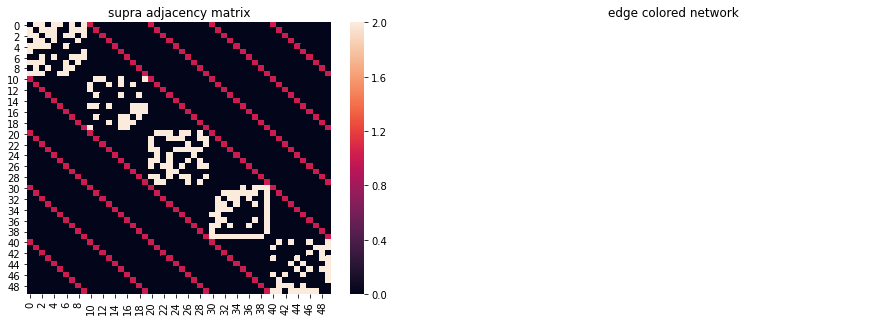

In [53]:
## Save to json and plot draft fig

fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(121)
sns.heatmap(mx.adjacency_matrix(mg,weight='weight').todense())
ax1.set_title('supra adjacency matrix')

ax2 = fig.add_subplot(122)
ax2.axis('off')
ax2.set_title('edge colored network')
# pos = mx.get_position(mg,mx.fruchterman_reingold_layout(g1),
#                       layer_vertical_shift=0.3,
#                       layer_horizontal_shift=0.0,
#                       proj_angle=47)

# pos = [nx.layout.fruchterman_reingold_layout(g1, dim=3)
#             for i in range(mg.get_number_of_layers())
#         ]
pos = nx.layout.fruchterman_reingold_layout(g1, dim=3)

# pos = mx.get_position3D(mg)
# mx.draw_networkx(mg,pos=pos,ax=ax2,node_size=50,with_labels=False,
#                  edge_color=[mg[a][b]['weight'] for a,b in mg.edges()],
#                  edge_cmap=plt.cm.jet_r)
# plt.show()

## Define dictionaries and save to json

# From the sparse adj, make a networkx graph and add node attributes
G = nx.from_numpy_array(mx.adjacency_matrix(mg,weight='weight').todense())

nLevels = 5
L2_classes = np.arange(nLevels)
## Each node will get attributes L1=node id, L2=slice number, x position, y position, and name/id

scalefact = 20
id_dict = {i:("id"+str(i)) for i in np.arange(nNodes*nLevels)}
x_dict = {}
y_dict = {}
L2_dict = {}
z_dict = {}
z_shift = 2
L1_dict = {}
for level in L2_classes:
    pos_dict = pos
    x_dict.update({(key+(level*nNodes)):float(pos_dict[key][0]+scalefact) for key in pos_dict})
    y_dict.update({(key+(level*nNodes)):float(pos_dict[key][1]+scalefact) for key in pos_dict})
    L2_dict.update({i:float(level) for i in (np.arange(nNodes)+ (level*nNodes))})
    z_dict.update({i:float(level*z_shift) for i in (np.arange(nNodes) + (level*nNodes))})
    L1_dict.update({(i+level*nNodes):int(i) for i in np.arange(nNodes)})



# nx.set_node_attributes(G, pos, name="pos")
nx.set_node_attributes(G, id_dict, name = "name")
nx.set_node_attributes(G, x_dict, name = "x")
nx.set_node_attributes(G, y_dict, name = "y")
nx.set_node_attributes(G, z_dict, name = "z")
nx.set_node_attributes(G, L1_dict, name= "L1")
nx.set_node_attributes(G, L2_dict, name= "L2")

G_json = json_graph.node_link_data(G)
with open('data/mx_slide10_test2.json', 'w') as fp:
    json.dump(G_json, fp)

print("done writing file")

In [50]:
L1_dict

{0: '0',
 1: '1',
 2: '2',
 3: '3',
 4: '4',
 5: '5',
 6: '6',
 7: '7',
 8: '8',
 9: '9',
 10: '0',
 11: '1',
 12: '2',
 13: '3',
 14: '4',
 15: '5',
 16: '6',
 17: '7',
 18: '8',
 19: '9',
 20: '0',
 21: '1',
 22: '2',
 23: '3',
 24: '4',
 25: '5',
 26: '6',
 27: '7',
 28: '8',
 29: '9',
 30: '0',
 31: '1',
 32: '2',
 33: '3',
 34: '4',
 35: '5',
 36: '6',
 37: '7',
 38: '8',
 39: '9',
 40: '0',
 41: '1',
 42: '2',
 43: '3',
 44: '4',
 45: '5',
 46: '6',
 47: '7',
 48: '8',
 49: '9'}

/opt/conda/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/opt/conda/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:585: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  and cb.iterable(edge_color) \
/opt/conda/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:595: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  for c in edge_color]):


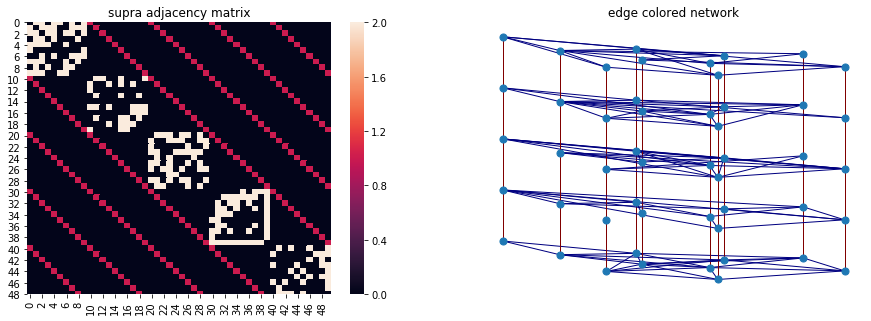

done writing file


In [6]:
# ## Save to json and plot draft fig

# fig = plt.figure(figsize=(15,5))
# ax1 = fig.add_subplot(121)
# sns.heatmap(mx.adjacency_matrix(mg,weight='weight').todense())
# ax1.set_title('supra adjacency matrix')

# ax2 = fig.add_subplot(122)
# ax2.axis('off')
# ax2.set_title('edge colored network')
# pos = mx.get_position(mg,mx.fruchterman_reingold_layout(g1),
#                       layer_vertical_shift=0.3,
#                       layer_horizontal_shift=0.0,
#                       proj_angle=47)
# mx.draw_networkx(mg,pos=pos,ax=ax2,node_size=50,with_labels=False,
#                  edge_color=[mg[a][b]['weight'] for a,b in mg.edges()],
#                  edge_cmap=plt.cm.jet_r)
# plt.show()

# ## Define dictionaries and save to json

# # From the sparse adj, make a networkx graph and add node attributes
# G = nx.from_numpy_array(mx.adjacency_matrix(mg,weight='weight').todense())

# L2_classes = np.arange(nLayers)
# ## Each node will get attributes L1=node id, L2=slice number, x position, y position, and name/id

# id_dict = {i:("id"+str(i)) for i in np.arange(nNodes*nLayers)}
# x_dict = {key:float(pos[key][0]) for key in pos}
# y_dict = {key:float(pos[key][1]) for key in pos}
# L1_dict = {i:str(i) for i in np.arange(nNodes*nLayers)}
# L2_dict = {i:1 for i in np.arange(nNodes)}
# L2_dict.update({i:2 for i in (np.arange(nNodes)+ nNodes)})
# L2_dict.update({i:3 for i in (np.arange(nNodes)+ 2*nNodes)})



# # nx.set_node_attributes(G, pos, name="pos")
# nx.set_node_attributes(G, id_dict, name = "name")
# nx.set_node_attributes(G, x_dict, name = "x")
# nx.set_node_attributes(G, y_dict, name = "y")
# nx.set_node_attributes(G, L1_dict, name= "L1")
# nx.set_node_attributes(G, L2_dict, name= "L2")

# # ## Set edge attributes
# # edge_dict = {}
# # for edge in G.edges():
    
# #     edge_dict[edge] = birth_times[max(edge[0],edge[1])]

# # edge_dict
# # nx.set_edge_attributes(G,edge_dict, name = "birth_time")

# ## Write to json file

# G_json = json_graph.node_link_data(G)
# with open('data/mx_slide10.json', 'w') as fp:
#     json.dump(G_json, fp)

# print("done writing file")

## Time series example

In [8]:
nNodes = 10
nLayers = 10

graph_layers = [mx.generators.erdos_renyi_graph(nNodes,0.5,seed=np.random.randint(1,300)) for i in np.arange(nLayers)]


# Define adjacency between layers
adj_block = mx.lil_matrix(np.zeros((nNodes*nLayers,nNodes*nLayers)))

for i in np.arange(nLayers-1):
    for l in np.arange(i+1,nLayers):
        adj_block[i*nNodes:(i+1)*nNodes, (l)*nNodes:(l+1)*nNodes] = np.identity(nNodes)   # L_1*

adj_block += adj_block.T

# Create multilayer graph
mg = mx.MultilayerGraph(list_of_layers=graph_layers,
                        inter_adjacency_matrix=adj_block)

mg.set_edges_weights(intra_layer_edges_weight=2,
                     inter_layer_edges_weight=1)




done writing file


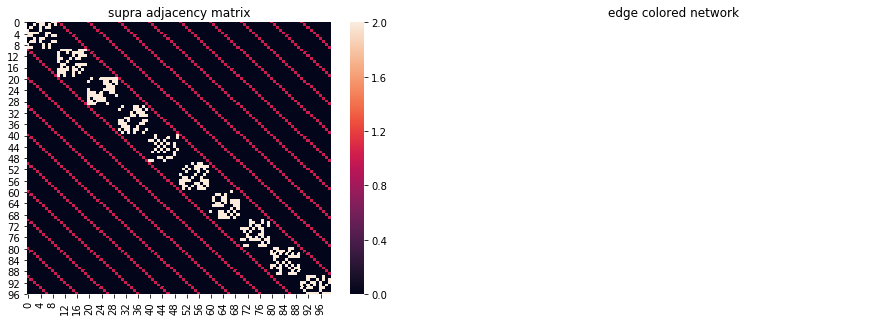

In [9]:
## Save to json and plot draft fig

fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(121)
sns.heatmap(mx.adjacency_matrix(mg,weight='weight').todense())
ax1.set_title('supra adjacency matrix')

ax2 = fig.add_subplot(122)
ax2.axis('off')
ax2.set_title('edge colored network')
# pos = mx.get_position(mg,mx.fruchterman_reingold_layout(g1),
#                       layer_vertical_shift=0.3,
#                       layer_horizontal_shift=0.0,
#                       proj_angle=47)

# pos = [nx.layout.fruchterman_reingold_layout(g1, dim=3)
#             for i in range(mg.get_number_of_layers())
#         ]
pos = nx.layout.fruchterman_reingold_layout(g1, dim=3)

# pos = mx.get_position3D(mg)
# mx.draw_networkx(mg,pos=pos,ax=ax2,node_size=50,with_labels=False,
#                  edge_color=[mg[a][b]['weight'] for a,b in mg.edges()],
#                  edge_cmap=plt.cm.jet_r)
# plt.show()

## Define dictionaries and save to json

# From the sparse adj, make a networkx graph and add node attributes
G = nx.from_numpy_array(mx.adjacency_matrix(mg,weight='weight').todense())

nLevels = 10
L2_classes = np.arange(nLevels)
## Each node will get attributes L1=node id, L2=slice number, x position, y position, and name/id

scalefact = 20
id_dict = {i:("id"+str(i)) for i in np.arange(nNodes*nLevels)}
x_dict = {}
y_dict = {}
L2_dict = {}
z_dict = {}
z_shift = 2
L1_dict = {}
for level in L2_classes:
    pos_dict = pos
    x_dict.update({(key+(level*nNodes)):float(pos_dict[key][0]+scalefact) for key in pos_dict})
    y_dict.update({(key+(level*nNodes)):float(pos_dict[key][1]+scalefact) for key in pos_dict})
    L2_dict.update({i:float(level) for i in (np.arange(nNodes)+ (level*nNodes))})
    z_dict.update({i:float(level*z_shift) for i in (np.arange(nNodes) + (level*nNodes))})
    L1_dict.update({(i+level*nNodes):str(i) for i in np.arange(nNodes)})

# L1_dict = {i:str(i) for i in np.arange(nNodes*nLevels)}
# L2_dict = {i:0 for i in np.arange(nNodes)}
# L2_dict.update({i:1 for i in (np.arange(nNodes)+ nNodes)})
# L2_dict.update({i:2 for i in (np.arange(nNodes)+ 2*nNodes)})
# L2_dict.update({i:3 for i in (np.arange(nNodes)+ 3*nNodes)})
# L2_dict.update({i:4 for i in (np.arange(nNodes)+ 4*nNodes)})

# z_dict = {i:1*z_shift for i in np.arange(nNodes)}
# z_dict.update({i:(2)*z_shift for i in (np.arange(nNodes)+ nNodes)})
# z_dict.update({i:(3)*z_shift for i in (np.arange(nNodes)+ 2*nNodes)})
# z_dict.update({i:(4)*z_shift for i in (np.arange(nNodes)+ 3*nNodes)})
# z_dict.update({i:(5)*z_shift for i in (np.arange(nNodes)+ 4*nNodes)})



# nx.set_node_attributes(G, pos, name="pos")
nx.set_node_attributes(G, id_dict, name = "name")
nx.set_node_attributes(G, x_dict, name = "x")
nx.set_node_attributes(G, y_dict, name = "y")
nx.set_node_attributes(G, z_dict, name = "z")
nx.set_node_attributes(G, L1_dict, name= "L1")
nx.set_node_attributes(G, L2_dict, name= "L2")

G_json = json_graph.node_link_data(G)
with open('data/mx_slide11_test.json', 'w') as fp:
    json.dump(G_json, fp)

# Also need to save sadj matrix
# np.savetxt('data/sadj_slide11.csv', mx.adjacency_matrix(mg,weight='weight').todense(), delimiter =', ') 

print("done writing file")

In [45]:
L1_dict

{0: '0',
 1: '1',
 2: '2',
 3: '3',
 4: '4',
 5: '5',
 6: '6',
 7: '7',
 8: '8',
 9: '9',
 10: '0',
 11: '1',
 12: '2',
 13: '3',
 14: '4',
 15: '5',
 16: '6',
 17: '7',
 18: '8',
 19: '9',
 20: '0',
 21: '1',
 22: '2',
 23: '3',
 24: '4',
 25: '5',
 26: '6',
 27: '7',
 28: '8',
 29: '9',
 30: '0',
 31: '1',
 32: '2',
 33: '3',
 34: '4',
 35: '5',
 36: '6',
 37: '7',
 38: '8',
 39: '9',
 40: '0',
 41: '1',
 42: '2',
 43: '3',
 44: '4',
 45: '5',
 46: '6',
 47: '7',
 48: '8',
 49: '9',
 50: '0',
 51: '1',
 52: '2',
 53: '3',
 54: '4',
 55: '5',
 56: '6',
 57: '7',
 58: '8',
 59: '9',
 60: '0',
 61: '1',
 62: '2',
 63: '3',
 64: '4',
 65: '5',
 66: '6',
 67: '7',
 68: '8',
 69: '9',
 70: '0',
 71: '1',
 72: '2',
 73: '3',
 74: '4',
 75: '5',
 76: '6',
 77: '7',
 78: '8',
 79: '9',
 80: '0',
 81: '1',
 82: '2',
 83: '3',
 84: '4',
 85: '5',
 86: '6',
 87: '7',
 88: '8',
 89: '9',
 90: '0',
 91: '1',
 92: '2',
 93: '3',
 94: '4',
 95: '5',
 96: '6',
 97: '7',
 98: '8',
 99: '9'}

/opt/conda/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/opt/conda/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:585: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  and cb.iterable(edge_color) \
/opt/conda/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:595: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  for c in edge_color]):


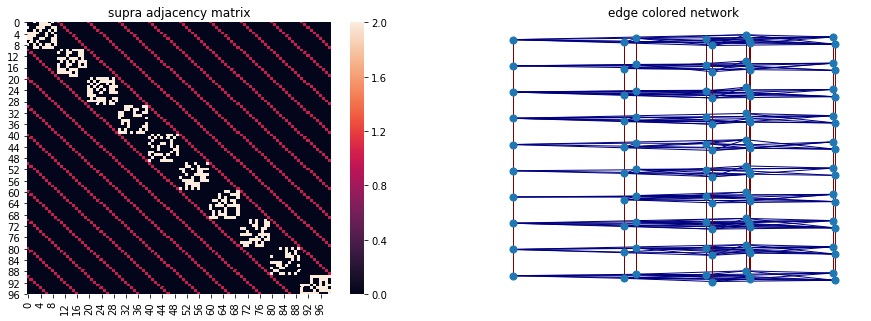

done writing file


In [8]:
## Save to json and plot draft fig

fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(121)
sns.heatmap(mx.adjacency_matrix(mg,weight='weight').todense())
ax1.set_title('supra adjacency matrix')

ax2 = fig.add_subplot(122)
ax2.axis('off')
ax2.set_title('edge colored network')
pos = mx.get_position(mg,mx.fruchterman_reingold_layout(g1),
                      layer_vertical_shift=2,
                      layer_horizontal_shift=0.0,
                      proj_angle=30)
mx.draw_networkx(mg,pos=pos,ax=ax2,node_size=50,with_labels=False,
                 edge_color=[mg[a][b]['weight'] for a,b in mg.edges()],
                 edge_cmap=plt.cm.jet_r)
plt.show()

## Define dictionaries and save to json

# From the sparse adj, make a networkx graph and add node attributes
G = nx.from_numpy_array(mx.adjacency_matrix(mg,weight='weight').todense())

L2_classes = np.arange(nLayers)
## Each node will get attributes L1=node id, L2=slice number, x position, y position, and name/id

id_dict = {i:("id"+str(i)) for i in np.arange(nNodes*nLayers)}
x_dict = {key:float(pos[key][0]) for key in pos}
y_dict = {key:float(pos[key][1]) for key in pos}
L1_dict = {i:str(i) for i in np.arange(nNodes*nLayers)}
L2_dict = {i:1 for i in np.arange(nNodes)}
L2_dict.update({i:2 for i in (np.arange(nNodes)+ nNodes)})
L2_dict.update({i:3 for i in (np.arange(nNodes)+ 2*nNodes)})



# nx.set_node_attributes(G, pos, name="pos")
nx.set_node_attributes(G, id_dict, name = "name")
nx.set_node_attributes(G, x_dict, name = "x")
nx.set_node_attributes(G, y_dict, name = "y")
nx.set_node_attributes(G, L1_dict, name= "L1")
nx.set_node_attributes(G, L2_dict, name= "L2")

# ## Set edge attributes
# edge_dict = {}
# for edge in G.edges():
    
#     edge_dict[edge] = birth_times[max(edge[0],edge[1])]

# edge_dict
# nx.set_edge_attributes(G,edge_dict, name = "birth_time")

## Write to json file

G_json = json_graph.node_link_data(G)
with open('data/mx_slide11.json', 'w') as fp:
    json.dump(G_json, fp)

print("done writing file")

## Non-identity inter-layer connections

In [59]:
nNodes = 10
nLayers = 3

graph_layers = [mx.generators.erdos_renyi_graph(nNodes,0.5,seed=np.random.randint(1,300)) for i in np.arange(nLayers)]


# Define adjacency between layers
adj_block = mx.lil_matrix(np.zeros((nNodes*nLayers,nNodes*nLayers)))

for i in np.arange(nLayers-1):
    for l in np.arange(i+1,nLayers):
        adj_block[i*nNodes:(i+1)*nNodes, (l)*nNodes:(l+1)*nNodes] = np.random.choice([0,1],size=(nNodes,nNodes),replace=True,p=[0.9,0.1])   # L_1*

adj_block += adj_block.T

# Create multilayer graph
mg = mx.MultilayerGraph(list_of_layers=graph_layers,
                        inter_adjacency_matrix=adj_block)

mg.set_edges_weights(intra_layer_edges_weight=2,
                     inter_layer_edges_weight=1)




/opt/conda/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/opt/conda/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:585: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  and cb.iterable(edge_color) \
/opt/conda/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:595: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  for c in edge_color]):


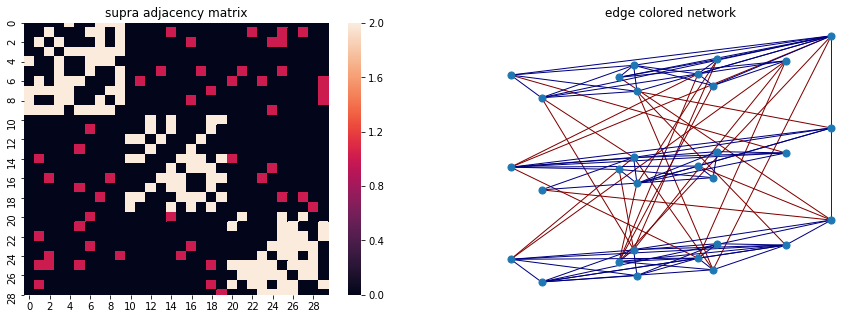

done writing file


In [63]:
## Save to json and plot draft fig

fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(121)
sns.heatmap(mx.adjacency_matrix(mg,weight='weight').todense())
ax1.set_title('supra adjacency matrix')

ax2 = fig.add_subplot(122)
ax2.axis('off')
ax2.set_title('edge colored network')
pos = mx.get_position(mg,mx.fruchterman_reingold_layout(g1),
                      layer_vertical_shift=2.5,
                      layer_horizontal_shift=0.0,
                      proj_angle=30)
mx.draw_networkx(mg,pos=pos,ax=ax2,node_size=50,with_labels=False,
                 edge_color=[mg[a][b]['weight'] for a,b in mg.edges()],
                 edge_cmap=plt.cm.jet_r)
plt.show()

## Define dictionaries and save to json

# From the sparse adj, make a networkx graph and add node attributes
G = nx.from_numpy_array(mx.adjacency_matrix(mg,weight='weight').todense())

L2_classes = np.arange(nLayers)
## Each node will get attributes L1=node id, L2=slice number, x position, y position, and name/id

id_dict = {i:("id"+str(i)) for i in np.arange(nNodes*nLayers)}
x_dict = {key:float(pos[key][0]) for key in pos}
y_dict = {key:float(pos[key][1]) for key in pos}
L1_dict = {i:str(i) for i in np.arange(nNodes*nLayers)}
L2_dict = {i:1 for i in np.arange(nNodes)}
L2_dict.update({i:2 for i in (np.arange(nNodes)+ nNodes)})
L2_dict.update({i:3 for i in (np.arange(nNodes)+ 2*nNodes)})



# nx.set_node_attributes(G, pos, name="pos")
nx.set_node_attributes(G, id_dict, name = "name")
nx.set_node_attributes(G, x_dict, name = "x")
nx.set_node_attributes(G, y_dict, name = "y")
nx.set_node_attributes(G, L1_dict, name= "L1")
nx.set_node_attributes(G, L2_dict, name= "L2")

# ## Set edge attributes
# edge_dict = {}
# for edge in G.edges():
    
#     edge_dict[edge] = birth_times[max(edge[0],edge[1])]

# edge_dict
# nx.set_edge_attributes(G,edge_dict, name = "birth_time")

## Write to json file

G_json = json_graph.node_link_data(G)
with open('data/mx_slide12.json', 'w') as fp:
    json.dump(G_json, fp)

print("done writing file")

## Case where nodes are not in every layer

In [64]:
nNodes = 10
nLayers = 4

graph_layers = [mx.generators.erdos_renyi_graph(nNodes,0.5,seed=np.random.randint(1,300)) for i in np.arange(nLayers)]


# Define adjacency between layers
adj_block = mx.lil_matrix(np.zeros((nNodes*nLayers,nNodes*nLayers)))

for i in np.arange(nLayers-1):
    for l in np.arange(i+1,nLayers):
        adj_block[i*nNodes:(i+1)*nNodes, (l)*nNodes:(l+1)*nNodes] = np.random.choice([0,1],size=(nNodes,nNodes),replace=True,p=[0.9,0.1])   # L_1*

adj_block += adj_block.T

# Create multilayer graph
mg = mx.MultilayerGraph(list_of_layers=graph_layers,
                        inter_adjacency_matrix=adj_block)

mg.set_edges_weights(intra_layer_edges_weight=2,
                     inter_layer_edges_weight=1)




In [ ]:
## Save to json and plot draft fig

fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(121)
sns.heatmap(mx.adjacency_matrix(mg,weight='weight').todense())
ax1.set_title('supra adjacency matrix')

ax2 = fig.add_subplot(122)
ax2.axis('off')
ax2.set_title('edge colored network')
pos = mx.get_position(mg,mx.fruchterman_reingold_layout(g1),
                      layer_vertical_shift=2.5,
                      layer_horizontal_shift=0.0,
                      proj_angle=30)
mx.draw_networkx(mg,pos=pos,ax=ax2,node_size=50,with_labels=False,
                 edge_color=[mg[a][b]['weight'] for a,b in mg.edges()],
                 edge_cmap=plt.cm.jet_r)
plt.show()

## Define dictionaries and save to json

# From the sparse adj, make a networkx graph and add node attributes
G = nx.from_numpy_array(mx.adjacency_matrix(mg,weight='weight').todense())

## List of nodes not in each layer
nodes_to_remove = [4, 14, 12, 19, 21]

L2_classes = np.arange(nLayers)
## Each node will get attributes L1=node id, L2=slice number, x position, y position, and name/id

id_dict = {i:("id"+str(i)) for i in np.arange(nNodes*nLayers)}
x_dict = {key:float(pos[key][0]) for key in pos}
y_dict = {key:float(pos[key][1]) for key in pos}
L1_dict = {i:str(i) for i in np.arange(nNodes*nLayers)}
L2_dict = {i:1 for i in np.arange(nNodes)}
L2_dict.update({i:2 for i in (np.arange(nNodes)+ nNodes)})
L2_dict.update({i:3 for i in (np.arange(nNodes)+ 2*nNodes)})



# nx.set_node_attributes(G, pos, name="pos")
nx.set_node_attributes(G, id_dict, name = "name")
nx.set_node_attributes(G, x_dict, name = "x")
nx.set_node_attributes(G, y_dict, name = "y")
nx.set_node_attributes(G, L1_dict, name= "L1")
nx.set_node_attributes(G, L2_dict, name= "L2")

# ## Set edge attributes
# edge_dict = {}
# for edge in G.edges():
    
#     edge_dict[edge] = birth_times[max(edge[0],edge[1])]

# edge_dict
# nx.set_edge_attributes(G,edge_dict, name = "birth_time")

## Write to json file

G_json = json_graph.node_link_data(G)
with open('data/mx_slide13.json', 'w') as fp:
    json.dump(G_json, fp)

print("done writing file")

In [6]:
############## Plotly please?

import igraph as ig

import json
import urllib.request as urllib2

data = []
req = urllib2.Request("https://raw.githubusercontent.com/plotly/datasets/master/miserables.json")
opener = urllib2.build_opener()
f = opener.open(req)
data = json.loads(f.read())

print(data.keys())

dict_keys(['nodes', 'links'])


In [7]:
N=len(data['nodes'])
N
L=len(data['links'])
Edges=[(data['links'][k]['source'], data['links'][k]['target']) for k in range(L)]

G=ig.Graph(Edges, directed=False)
data['nodes'][0]

labels=[]
group=[]
for node in data['nodes']:
    labels.append(node['name'])
    group.append(node['group'])
    
layt=G.layout('kk', dim=3)
Xn=[layt[k][0] for k in range(N)]# x-coordinates of nodes
Yn=[layt[k][1] for k in range(N)]# y-coordinates
Zn=[layt[k][2] for k in range(N)]# z-coordinates
Xe=[]
Ye=[]
Ze=[]
for e in Edges:
    Xe+=[layt[e[0]][0],layt[e[1]][0], None]# x-coordinates of edge ends
    Ye+=[layt[e[0]][1],layt[e[1]][1], None]
    Ze+=[layt[e[0]][2],layt[e[1]][2], None]


In [8]:
import plotly.express as px
import plotly.graph_objs as go

trace1=go.Scatter3d(x=Xe,
               y=Ye,
               z=Ze,
               mode='lines',
               line=dict(color='rgb(125,125,125)', width=1),
               hoverinfo='none'
               )

trace2=go.Scatter3d(x=Xn,
               y=Yn,
               z=Zn,
               mode='markers',
               name='actors',
               marker=dict(symbol='circle',
                             size=6,
                             color=group,
                             colorscale='Viridis',
                             line=dict(color='rgb(50,50,50)', width=0.5)
                             ),
               text=labels,
               hoverinfo='text'
               )

axis=dict(showbackground=False,
          showline=False,
          zeroline=False,
          showgrid=False,
          showticklabels=False,
          title=''
          )

layout = go.Layout(
         title="Network of coappearances of characters in Victor Hugo's novel<br> Les Miserables (3D visualization)",
         width=1000,
         height=1000,
         showlegend=False,
         scene=dict(
             xaxis=dict(axis),
             yaxis=dict(axis),
             zaxis=dict(axis),
        ),
     margin=dict(
        t=100
    ),
    hovermode='closest',
    annotations=[
           dict(
           showarrow=False,
            text="Data source: <a href='http://bost.ocks.org/mike/miserables/miserables.json'>[1] miserables.json</a>",
            xref='paper',
            yref='paper',
            x=0,
            y=0.1,
            xanchor='left',
            yanchor='bottom',
            font=dict(
            size=14
            )
            )
        ],    )

data=[trace1, trace2]
fig=go.Figure(data=data, layout=layout)

py.iplot(fig, filename='Les-Miserables')

ModuleNotFoundError: No module named 'plotly.express'

In [7]:
pip uninstall cufflinks pip install plotly == 3.10.0

ERROR: Invalid requirement: '=='
Note: you may need to restart the kernel to use updated packages.
